In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

In [5]:
df = pd.read_csv (r'C:\\Automobile.csv')

In [6]:
df.head() 

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [7]:
# check NaN
df.isnull().values.any()

True

In [8]:
df = df.fillna(method='ffill')  

C:\Users\Анастасія\AppData\Local\Temp\ipykernel_19040\856610927.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [9]:
df.isnull().values.any()

False

In [11]:
# Matrix
selected_data = df[['mpg', 'cylinders', 'displacement', 'horsepower']].head(10)

max_vals = selected_data.max()
min_vals = selected_data.min()

result_matrix = pd.concat([max_vals, min_vals], axis=1)
result_matrix.columns = ['max val', 'min val']

def highlight_max_min(val):
    is_max = val == max_vals
    is_min = val == min_vals
    styles = ['background-color: green' if m else 'background-color: red' if n else '' for m, n in zip(is_max, is_min)]
    return styles

styled_result_matrix = result_matrix.style.apply(highlight_max_min, axis=0)
styled_result_matrix

,max val,min val
mpg,18.000000,14.000000
cylinders,8.000000,8.000000
displacement,455.000000,302.000000
horsepower,225.000000,130.000000


In [12]:
# Mat Expectation
non_numeric_columns = ['name', 'origin']
df = df.drop(non_numeric_columns, axis=1)

mean_values = df.mean()
mean_values

mpg               23.514573
cylinders          5.454774
displacement     193.425879
horsepower       104.178392
weight          2970.424623
acceleration      15.568090
model_year        76.010050
dtype: float64

In [13]:
# dispersion
dispersion = df.var(numeric_only=True)
dispersion

mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1466.494545
weight          717140.990526
acceleration         7.604848
model_year          13.672443
dtype: float64

In [14]:
#standard data
numeric_columns = df.select_dtypes(include=[float, int])
df[numeric_columns.columns] = ((numeric_columns - numeric_columns.mean()) / numeric_columns.std()).round(2)
print("standard data:")
print(df)

standard data:
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   -0.71       1.50          1.09        0.67    0.63         -1.29   
1   -1.09       1.50          1.50        1.59    0.85         -1.48   
2   -0.71       1.50          1.19        1.20    0.55         -1.66   
3   -0.96       1.50          1.06        1.20    0.55         -1.29   
4   -0.83       1.50          1.04        0.94    0.57         -1.84   
..    ...        ...           ...         ...     ...           ...   
393  0.45      -0.86         -0.51       -0.47   -0.21          0.01   
394  2.62      -0.86         -0.92       -1.36   -0.99          3.28   
395  1.09      -0.86         -0.56       -0.53   -0.80         -1.44   
396  0.57      -0.86         -0.70       -0.66   -0.41          1.10   
397  0.96      -0.86         -0.71       -0.58   -0.30          1.39   

     model_year  
0         -1.63  
1         -1.63  
2         -1.63  
3         -1.63  
4         -1.63  
..          

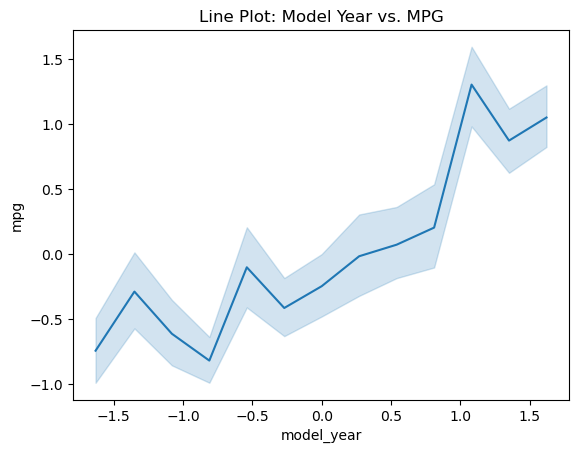

In [15]:
# Line Plot
sns.lineplot(x="model_year", y="mpg", data=df)
plt.title('Line Plot: Model Year vs. MPG')
plt.show()

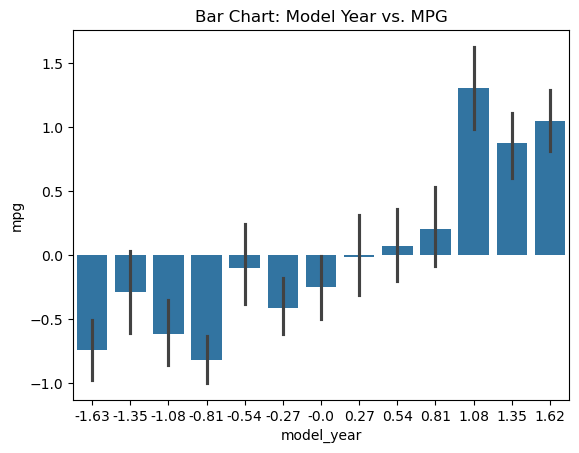

In [16]:
# Bar Chart
sns.barplot(x="model_year", y="mpg", data=df)
plt.title('Bar Chart: Model Year vs. MPG')
plt.show()

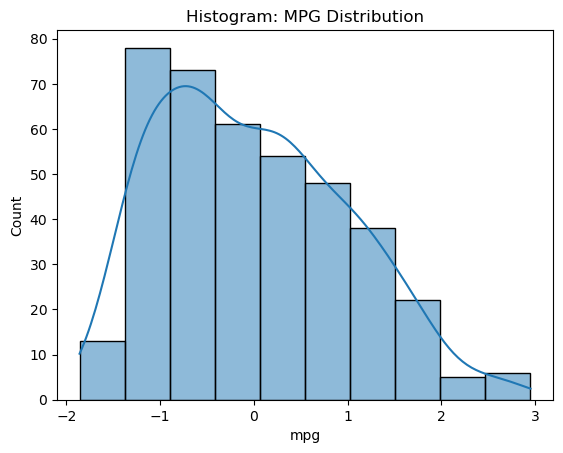

In [17]:
# Histogram
sns.histplot(df['mpg'], bins=10, kde=True)
plt.title('Histogram: MPG Distribution')
plt.show()

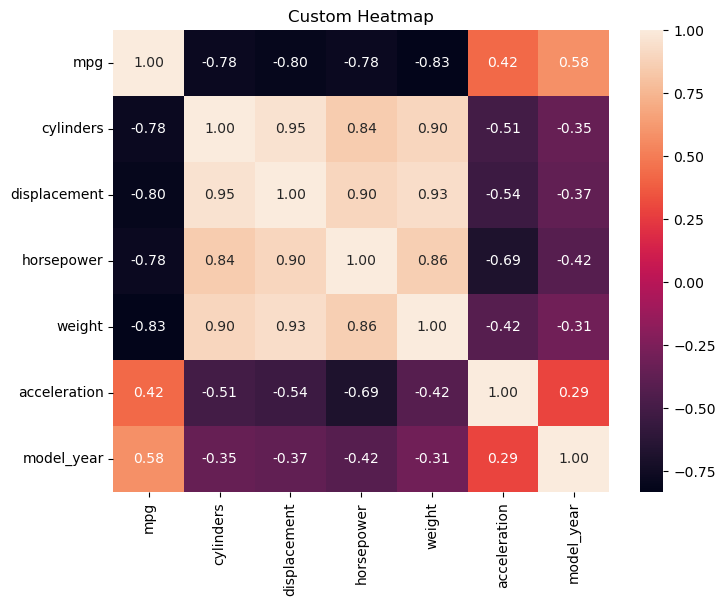

In [18]:
#Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Custom Heatmap')
plt.show()